In [24]:
import csv
import pandas as pd
import numpy as np

In [25]:
spam_or_ham = pd.read_csv("spam.csv", encoding='latin-1')[["v1", "v2"]]
spam_or_ham.columns = ["label", "text"]
spam_or_ham.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
spam_or_ham["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [39]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [40]:
spam_or_ham.head()["text"].apply(tokenize)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, dont, think, he, goes, to, usf, he, l...
Name: text, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True
)

In [42]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(spam_or_ham["text"], spam_or_ham["label"], stratify=spam_or_ham["label"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 4179, testing examples 1393


In [31]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

In [33]:
from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

Accuracy: 97.9182%


In [34]:
frases = [
  'Are you looking to redesign your website with new modern look and feel?',
  'Please send me a confirmation of complete and permanent erasure of the personal data',
  'You have been selected to win a FREE suscription to our service',
  'We’re contacting you because the webhook endpoint associated with your account in test mode has been failing',
  'Confirma tu cuenta de Facebook en el siguiente link',
  'You have been selected to participate in a free service'
]

In [35]:
frases_X = real_vectorizer.transform(frases)
predicciones = classifier.predict(frases_X)

In [36]:
for text, label in zip(frases, predicciones):
  print(f"{label:5} - {text}")

ham   - Are you looking to redesign your website with new modern look and feel?
ham   - Please send me a confirmation of complete and permanent erasure of the personal data
spam  - You have been selected to win a FREE suscription to our service
ham   - We’re contacting you because the webhook endpoint associated with your account in test mode has been failing
ham   - Confirma tu cuenta de Facebook en el siguiente link
spam  - You have been selected to participate in a free service


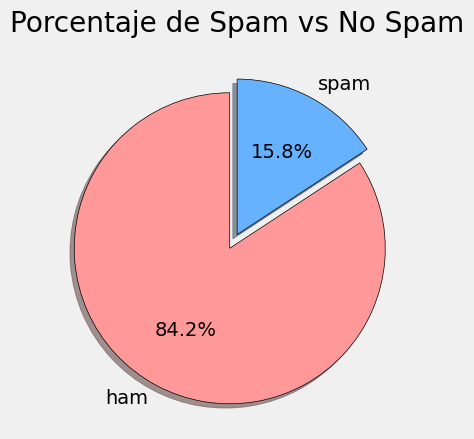

In [102]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
from collections import Counter

with open('/content/spam_spanish.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

with open('/content/spam_spanish.csv', encoding=encoding) as csv_file:
    csv_reader = csv.DictReader(csv_file)
    spam_counter = Counter()

    for row in csv_reader:
        spam_counter.update(row['label'].split(';'))

labels = []
counts = []
colors = ['#FF9999', '#66B2FF']

for item in spam_counter.items():
    labels.append(item[0])
    counts.append(item[1])

plt.style.use("fivethirtyeight")

# Explode the first slice (spam)
explode = (0.1, 0)  # Explode the first slice (spam)

plt.pie(counts, labels=labels, colors=colors, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title('Porcentaje de Spam vs No Spam')
plt.show()